In [1]:
import os
import shutil
import cv2  
import random  
import numpy as np  
import matplotlib.pyplot as plt  

from tools.format_images import center_crop, resize  

random.seed(42)

In [2]:
def show_one_sample(target_dir, k=5):
    final_images = []  
    for concept in os.listdir(target_dir):  
        if not os.path.isdir(os.path.join(target_dir, concept)):  
            continue
        image_path = os.path.join(target_dir, concept)
        if "v0" in os.listdir(image_path):
            image_path = os.path.join(image_path, "v0")
        filename = random.choice(os.listdir(image_path))
        image = cv2.imread(os.path.join(image_path, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = center_crop(image)
        image = resize(image)
        final_images.append(image)

    if len(final_images) == 0:
        print("No images found!")
    else:
        img_h, img_w, img_c = final_images[0].shape  # 獲取圖片尺寸
        black_img = np.ones((img_h, img_w, img_c), dtype=np.uint8)  
        black_img[:] = [254, 252, 249] # slides color
        # black_img[:] = [0, 0, 0] # 黑色圖片  


        rows = []
        for i in range(0, len(final_images), k):
            row_images = final_images[i:i+k]
            while len(row_images) < k:  # 補足 k 張圖片
                row_images.append(black_img)
            row = np.concatenate(row_images, axis=1)  # 橫向拼接 k 張圖片
            rows.append(row)

        final_image = np.concatenate(rows, axis=0)  # 縱向拼接所有行  

        plt.figure(figsize=(20, 20))
        plt.axis('off')  
        plt.imshow(final_image)  
        plt.show()
    
def show_one_sample_separately(target_dir):
    for concept in os.listdir(target_dir):  
        if not os.path.isdir(os.path.join(target_dir, concept)):  
            continue
        image_path = os.path.join(target_dir, concept)
        if "v0" in os.listdir(image_path):
            image_path = os.path.join(image_path, "v0")
        filename = random.choice(os.listdir(image_path))
        image = cv2.imread(os.path.join(image_path, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = center_crop(image)
        image = resize(image)
        plt.figure(figsize=(10, 10))
        plt.axis('off')
        plt.imshow(image)

In [3]:
def show_all_sample(target_dir):
    final_rows = []  
    max_width = 0  # 記錄最寬的 concept 行

    for concept in os.listdir(target_dir):  
        concept_path = os.path.join(target_dir, concept)
        if not os.path.isdir(concept_path):  
            continue  

        # 若資料夾內有 "v0"，則進入該資料夾
        if "v0" in os.listdir(concept_path):  
            concept_path = os.path.join(concept_path, "v0")  

        images = []  
        for filename in os.listdir(concept_path):  
            image = cv2.imread(os.path.join(concept_path, filename))
            if image is None:
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = center_crop(image)
            image = resize(image)
            images.append(image)
        images = images[:8]  # 只取前 8 張圖片

        if len(images) == 0:
            continue  

        # 確保所有圖片尺寸一致  
        img_h, img_w, img_c = images[0].shape  
        black_img = np.zeros((img_h, img_w, img_c), dtype=np.uint8)  

        # 每個 concept 的圖片合併成一行
        concept_row = np.concatenate(images, axis=1)  
        final_rows.append(concept_row)

        # 更新最大寬度
        max_width = max(max_width, concept_row.shape[1])

    # **填充所有行到相同的寬度**
    for i in range(len(final_rows)):
        row_h, row_w, row_c = final_rows[i].shape  
        if row_w < max_width:  # 若寬度不足，則補上黑色區域
            pad_width = max_width - row_w
            padding = np.zeros((row_h, pad_width, row_c), dtype=np.uint8)
            final_rows[i] = np.concatenate([final_rows[i], padding], axis=1)

    # **最終拼接所有行**
    if len(final_rows) > 0:
        final_image = np.concatenate(final_rows, axis=0)  
        plt.figure(figsize=(50, 50))
        plt.axis('off')  
        plt.imshow(final_image)  
        plt.show()  
    else:
        print("No images found!")


def show_all_sample_separately(target_dir):
    for concept in os.listdir(target_dir):  
        concept_path = os.path.join(target_dir, concept)
        if not os.path.isdir(concept_path):  
            continue  

        # 若資料夾內有 "v0"，則進入該資料夾
        if "v0" in os.listdir(concept_path):  
            concept_path = os.path.join(concept_path, "v0")  

        images = []  
        for filename in os.listdir(concept_path):  
            image = cv2.imread(os.path.join(concept_path, filename))
            if image is None:
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = center_crop(image)
            image = resize(image)
            images.append(image)
        images = images[:8]  # 只取前 8 張圖片

        if len(images) == 0:
            continue  

        # 確保所有圖片尺寸一致  
        img_h, img_w, img_c = images[0].shape  
        black_img = np.zeros((img_h, img_w, img_c), dtype=np.uint8)  

        # 每個 concept 的圖片合併成一行
        concept_row = np.concatenate(images, axis=1)
        plt.figure(figsize=(10, 10))
        plt.axis('off')
        plt.imshow(concept_row)
        plt.show()

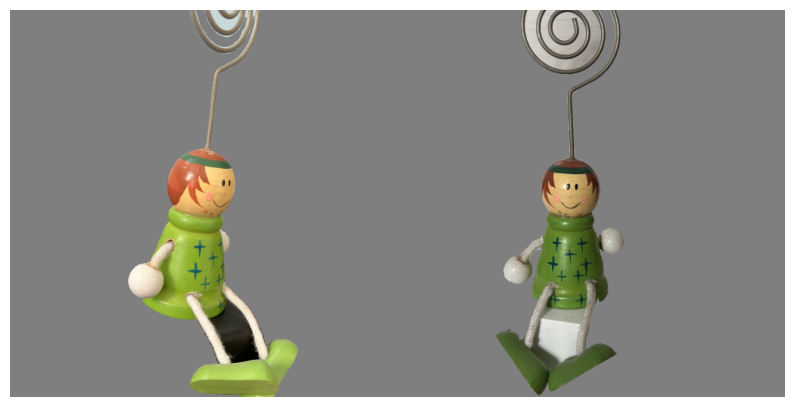

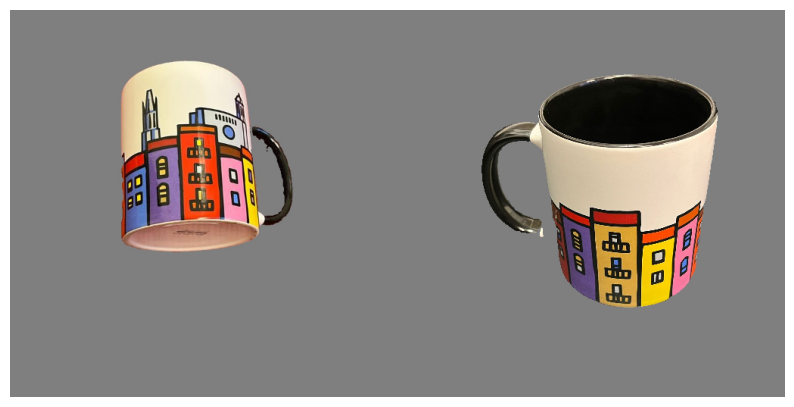

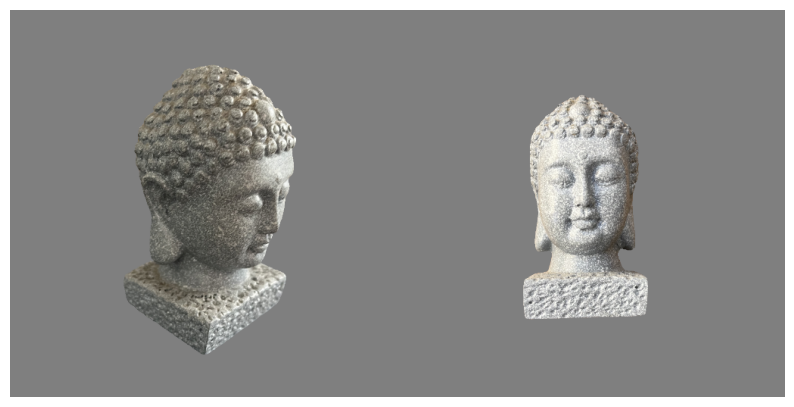

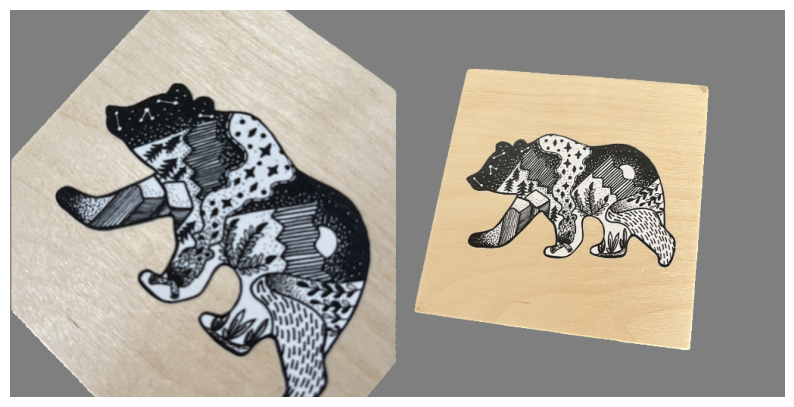

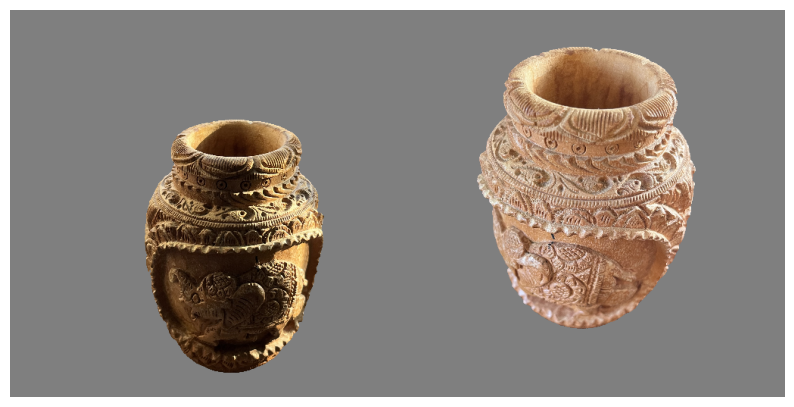

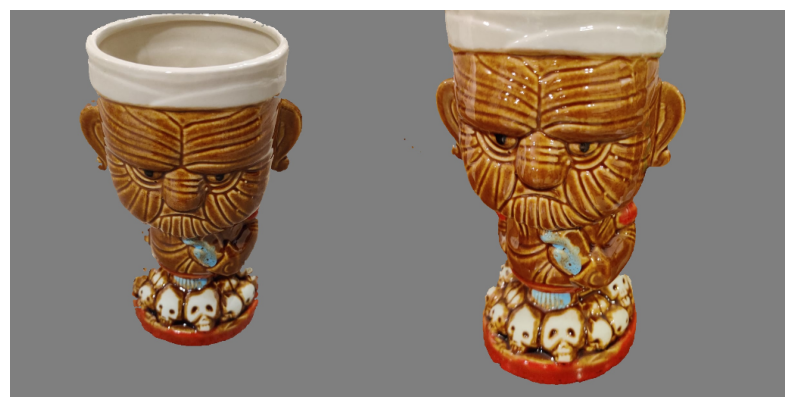

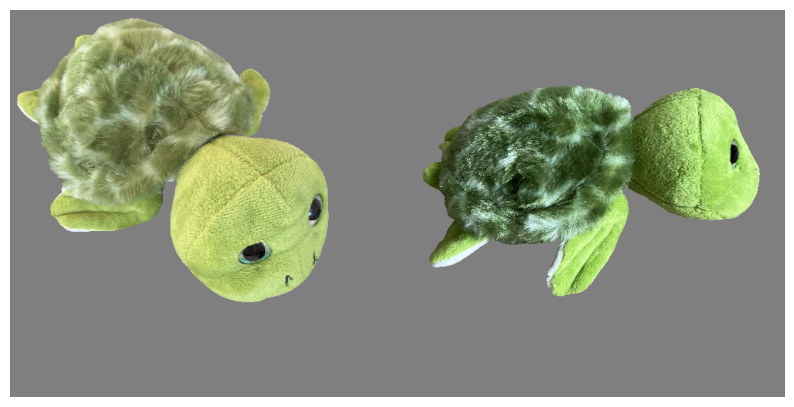

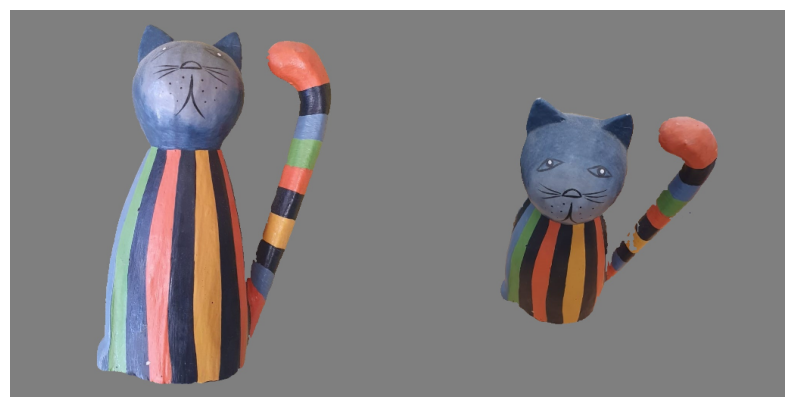

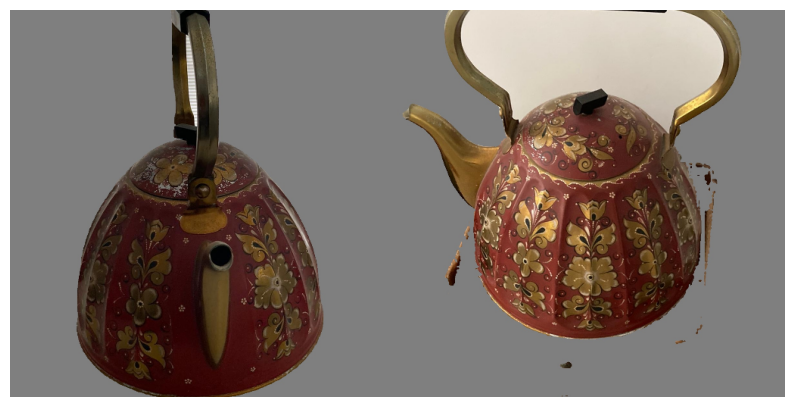

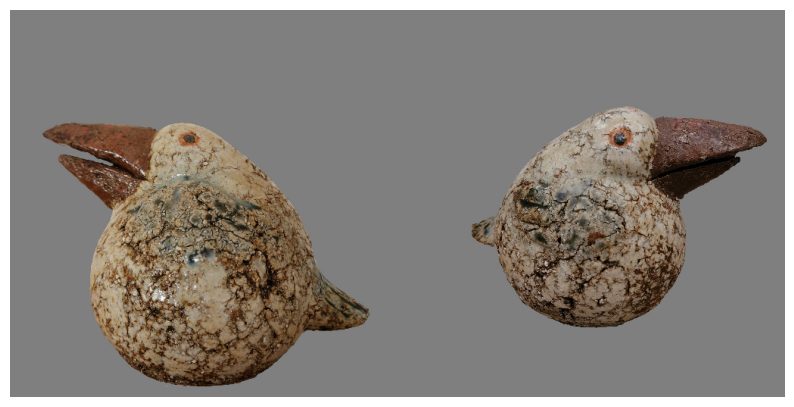

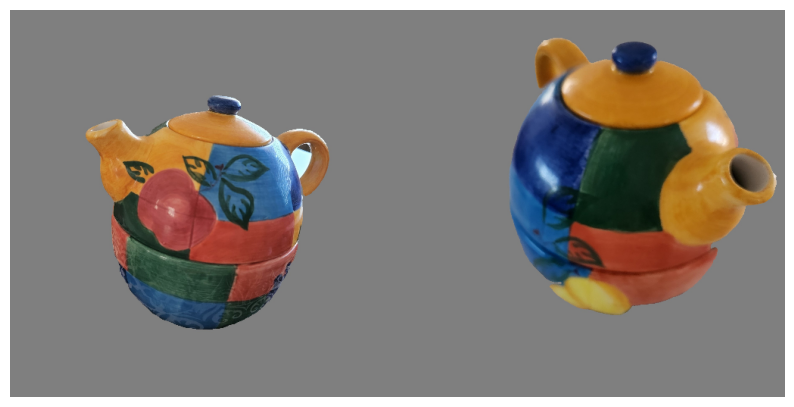

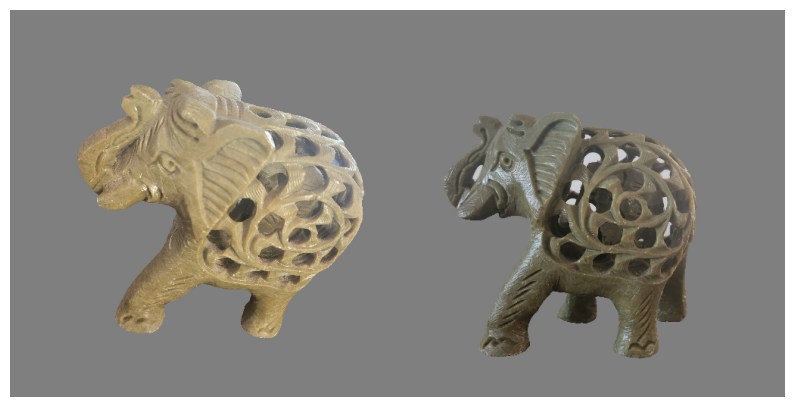

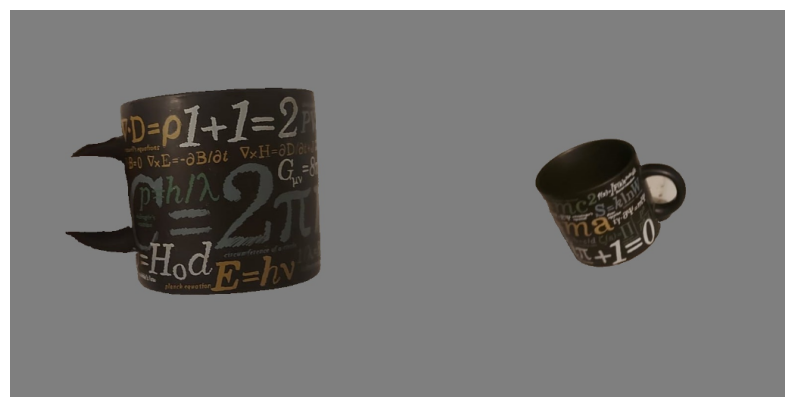

In [5]:
# target_dir = "/home/jack/Code/Research/textual_inversion_data"
# target_dir = "/home/jack/Code/Research/dreambooth/dataset"
# target_dir = "/home/jack/Code/Research/instree_main/datasets"
# target_dir = "/home/jack/Code/Research/CustomConcept101""

# target_dir = "/home/jack/Code/Research/instree_analysis/experiment_data/InsData_clip"
# target_dir = "/home/jack/Code/Research/instree_analysis/experiment_data/BackData_clip"
target_dir = "/home/jack/Code/Research/instree_analysis/experiment_data/InsData_clip_min"

target_dir = "/home/jack/Code/Research/instree_analysis/experiment_image/InsData_clip_min/InsData_clip_min_masked"
# target_dir = "/home/jack/Code/Research/instree_analysis/experiment_image/BackData_clip/BackData_clip_masked"

# show_one_sample(target_dir, k=15)
# show_all_sample(target_dir)
# show_one_sample_separately(target_dir)
show_all_sample_separately(target_dir)

In [9]:
def move_images_to_v0(target_dir):
    """
    將資料夾內的圖片移動到 v0 資料夾
    """
    if not os.path.exists(target_dir):
        print("Directory does not exist!")
        return

    # 確保每個 concept 都有一個 v0 資料夾
    for concept in os.listdir(target_dir):
        os.makedirs(os.path.join(target_dir, concept, "v0"), exist_ok=True)
        for image in os.listdir(os.path.join(target_dir, concept)):
            if image != 'v0':
                print(image)
                os.rename(os.path.join(target_dir, concept, image), os.path.join(target_dir, concept, "v0", image))
        print("=>", concept, "images moved to v0")


target_dir = "/home/jack/Code/Research/instree_analysis/experiment_data/v3"
move_images_to_v0(target_dir)

0.png
4.png
1.png
8.png
7.png
2.jpeg
5.png
3.png
9.png
6.png
=> wearable_sunglasses1 images moved to v0
2.png
0.png
1.png
3.png
=> toy_bear images moved to v0
rosemary-fields-lxDmpH2QLmM-unsplash.jpg
rosemary-fields-Ah52Hgrae-Y-unsplash.jpg
rosemary-fields-cHo2KJxqPuU-unsplash.jpg
rosemary-fields-ZIGZDDsoYCw-unsplash.jpg
=> furniture_chair2 images moved to v0
5.jpg
0.jpg
1.jpg
4.png
8.png
7.png
3.png
2.jpg
9.png
6.png
=> plushie_pink images moved to v0
0.jpg
1.jpg
3.jpg
2.jpg
=> scene_sculpture1 images moved to v0
0.jpg
1.jpg
2.jpg
=> transport_bike images moved to v0
4.jpg
5.jpg
0.jpg
1.jpg
6.jpg
3.jpg
2.jpg
=> scene_barn images moved to v0
02.jpg
00.jpg
04.jpg
01.jpg
03.jpg
=> grey_sloth_plushie images moved to v0
clay-banks-uaKbXAjtJAE-unsplash.jpg
clay-banks-w9wV2Hwz9sI-unsplash.jpg
clay-banks-z8VRnFiO-BU-unsplash.jpg
=> decoritems_lamp1 images moved to v0
=> backpack_dog images moved to v0
=> red_teapot images moved to v0
2.png
0.png
4.png
1.png
8.png
7.png
5.png
3.png
9.png
6.png

In [ ]:
def flatten_exp(target_dir):
    """
    將資料夾從 outputs/{concept}/exp{1,2,3...} 轉成 outputs/{concept}_exp{1,2,3...}
    target_dir: 資料夾路徑, outputs/{concept}/v0
    """
    if not os.path.exists(target_dir):
        print("Directory does not exist!")
        return
    
    concept_name = target_dir.split("/")[-2]
    
    for exp in os.listdir(target_dir):
        exp_setting = exp.split("_")[1]
        exp_other = exp.replace(exp_setting+"_", "")
        new_path = os.path.join(target_dir.replace(concept_name, concept_name + "_" + exp_setting), exp_other)
        
        os.makedirs(new_path, exist_ok=True)
        os.rename(os.path.join(target_dir, exp), new_path)
        print("=>", exp, "moved to", new_path)
    
    target_dir_parent = "/".join(target_dir.split('/')[:-1])
    shutil.rmtree(target_dir_parent)
    print("Removed:", target_dir_parent)


target_dir = "/home/jack/Code/Research/instree_analysis/experiments/test/20250506_0410_rand_rate/outputs/canada_bear/v0"
flatten_exp(target_dir)


=> v0_0.5_seed0 moved to /home/jack/Code/Research/instree_analysis/experiments/test/20250506_0410_rand_rate/outputs/canada_bear_0.5/v0/v0_seed0
=> v0_0.8_seed0 moved to /home/jack/Code/Research/instree_analysis/experiments/test/20250506_0410_rand_rate/outputs/canada_bear_0.8/v0/v0_seed0
=> v0_0.6_seed0 moved to /home/jack/Code/Research/instree_analysis/experiments/test/20250506_0410_rand_rate/outputs/canada_bear_0.6/v0/v0_seed0
=> v0_0.7_seed0 moved to /home/jack/Code/Research/instree_analysis/experiments/test/20250506_0410_rand_rate/outputs/canada_bear_0.7/v0/v0_seed0
=> v0_0.9_seed0 moved to /home/jack/Code/Research/instree_analysis/experiments/test/20250506_0410_rand_rate/outputs/canada_bear_0.9/v0/v0_seed0
=> v0_0.95_seed0 moved to /home/jack/Code/Research/instree_analysis/experiments/test/20250506_0410_rand_rate/outputs/canada_bear_0.95/v0/v0_seed0
=> v0_1.0_seed0 moved to /home/jack/Code/Research/instree_analysis/experiments/test/20250506_0410_rand_rate/outputs/canada_bear_1.0/v0

In [3]:
import os
import shutil

def remove_folders_by_prefix(root_path, folder_name_prefix):
    """
    Recursively remove all subdirectories whose names start with the given prefix.

    Parameters:
        root_path (str): The root directory to search under.
        folder_name_prefix (str): The prefix of folder names to remove.
    """
    for dirpath, dirnames, filenames in os.walk(root_path, topdown=False):
        for dirname in dirnames:
            if dirname.startswith(folder_name_prefix):
                full_path = os.path.join(dirpath, dirname)
                try:
                    shutil.rmtree(full_path)
                    print(f"Removed: {full_path}")
                except Exception as e:
                    print(f"Failed to remove {full_path}: {e}")


remove_folders_by_prefix("/home/jack/Code/Research/instree_analysis/experiments", "checkpoint")

Removed: /home/jack/Code/Research/instree_analysis/experiments/v2_sub_clip/20250425_instree_fixed/outputs/green_dall/v0/v0_seed1234/checkpoint-200
Removed: /home/jack/Code/Research/instree_analysis/experiments/v2_sub_clip/20250425_instree_fixed/outputs/green_dall/v0/v0_seed0/checkpoint-200
Removed: /home/jack/Code/Research/instree_analysis/experiments/v2_sub_clip/20250425_instree_fixed/outputs/green_dall/v0/v0_seed1000/checkpoint-200
Removed: /home/jack/Code/Research/instree_analysis/experiments/v2_sub_clip/20250425_instree_fixed/outputs/green_dall/v0/v0_seed111/checkpoint-200
Removed: /home/jack/Code/Research/instree_analysis/experiments/v2_sub_clip/20250425_instree_fixed/outputs/mug_buildings/v0/v0_seed1234/checkpoint-200
Removed: /home/jack/Code/Research/instree_analysis/experiments/v2_sub_clip/20250425_instree_fixed/outputs/mug_buildings/v0/v0_seed0/checkpoint-200
Removed: /home/jack/Code/Research/instree_analysis/experiments/v2_sub_clip/20250425_instree_fixed/outputs/mug_buildings